In [1]:
import argparse
import os

import cv2 as cv
import pandas as pd
import torch
import torchvision.transforms as transforms
from PIL import Image
from tqdm import tqdm
from model import Autoencoder_Unet
from rasterio.plot import reshape_as_raster, reshape_as_image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = Autoencoder_Unet(encoder_name='resnet50')
checkpoint = torch.load('../../../../models/autoencoder_summer_imagenet_pretrained_no_es.pth', map_location='cpu')
model.load_state_dict(checkpoint['model_state_dict'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [3]:
test_df = pd.read_csv('../../../../test_data/divided_20180611/test.csv')

image_info = test_df.iloc[10]

datasets_path = '../../../../test_data/divided_20180611/'

img_path = os.path.join(datasets_path, image_info["dataset_folder"], "images",
                        image_info["name"] + '_' + image_info["channel"] + '_' + image_info["position"] + '.' +
                        image_info["image_type"])
img = Image.open(img_path)

img_tensor = transforms.ToTensor()(img)

prediction = model(img_tensor.view(1, 3, image_info["image_size"], image_info["image_size"]))


In [4]:
prediction = prediction[0].detach().numpy()

In [5]:
prediction = reshape_as_image(prediction)

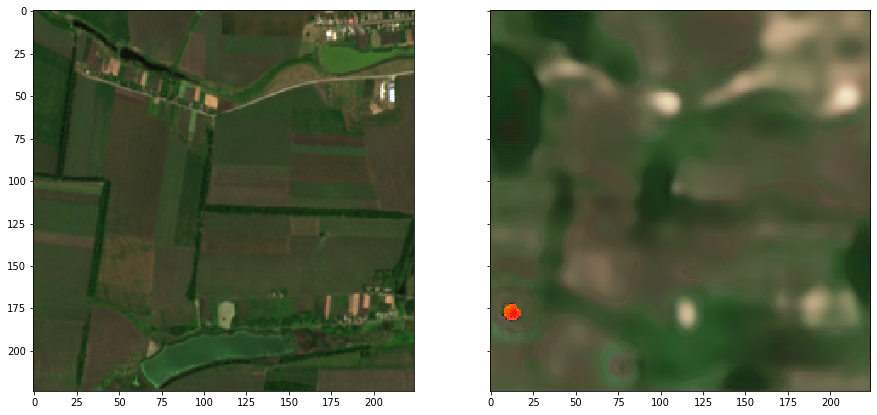

In [6]:
f, ax = plt.subplots(1, 2, sharey=True, figsize=(15,15))
ax[1].imshow(prediction)
ax[0].imshow(img)

In [7]:
import torchvision.models as models

In [11]:
resnet50 = models.resnet50()

In [12]:
resnet50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [14]:
processed = resnet50(img_tensor.view(1, 3, image_info["image_size"], image_info["image_size"]))

In [16]:
processed.sum()

tensor(3.5354, grad_fn=<SumBackward0>)

In [17]:
resnet50 = model.encoder

In [18]:
resnet50

ResNetEncoder(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1),

In [19]:
processed2 = resnet50(img_tensor.view(1, 3, image_info["image_size"], image_info["image_size"]))

In [20]:
processed2.sum()

AttributeError: 'list' object has no attribute 'sum'